In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/RobaeeDataset.zip

In [ ]:
!pip install hazm

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./RobaeeDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,آن سالک گرم روْ که در شیب و فراز چون شمع فرو ...,attar
1,ور راه ز پس قطع کنی پایانت آن ذرّه بر آفتاب ب...,attar
2,بحری که در آسمان زمین خواهد بود آنجا وینجا هم...,attar
3,هر لحظه دهد عشق توام سرشوئی تا من سر و پای گم...,attar
4,چون سنگ وجود لعل شد کانم را در میبینم قطرهٔ ب...,attar
...,...,...
2167,توبه که دل خویش چو آهن کرده است در کشتن بنده ...,moulavi
2168,عشق آمد و توبه را چو شیشه بشکست چون شیشه شکست...,moulavi
2169,شمعی که در اینخانه بدی خانه کجاست در دیده بد ...,moulavi
2170,آمد بر من چو در کفم زر پنداشت چون دید که زر ن...,moulavi


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,آن سالک گرم رو که در شیب و فراز چون شمع فرو گد...,attar
1,ور راه ز پس قطع کنی پایانت آن ذره بر آفتاب بگز...,attar
2,بحری که در آسمان زمین خواهد بود آنجا وینجا هما...,attar
3,هر لحظه دهد عشق توام سرشوئی تا من سر و پای گم ...,attar
4,چون سنگ وجود لعل شد کانم را در می بینم قطره با...,attar
...,...,...
2167,توبه که دل خویش چو آهن کرده است در کشتن بنده چ...,moulavi
2168,عشق آمد و توبه را چو شیشه بشکست چون شیشه شکست ...,moulavi
2169,شمعی که در اینخانه بدی خانه کجاست در دیده بد ا...,moulavi
2170,آمد بر من چو در کفم زر پنداشت چون دید که زر نی...,moulavi


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,سالک گرم شیب فراز شمع گداخت سوز گداز دلش عالم ...,attar
1,قطع پایانت ذره آفتاب بگزینی ره درافتد جانت ظاه...,attar
2,بحری آسمان زمین وینجا العرش تاثری قطره دریا قطره,attar
3,لحظه عشق توام سرشوئی پای گم گوئی مژهای بریزم ج...,attar
4,سنگ لعل کانم بینم قطره بارانم برخاست ننشیند نش...,attar
...,...,...
2167,توبه دل آهن کشتن بنده روشن زلف شکن شکنست توبه,moulavi
2168,عشق توبه شیشه بشکست شیشه شکست کیست داند بست شک...,moulavi
2169,شمعی اینخانه بدی خانه دلهاست دل خیال برخاست نی...,moulavi
2170,کفم زر پنداشت زر وفا بگذاشت حلقه گوش پندارم کا...,moulavi


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,سالک گرم شیب فراز شمع گداخت سوز گداز دلش عالم ...,attar
1,قطع پایانت ذره آفتاب بگزینی ره درافتد جانت ظاه...,attar
2,بحری آسمان زمین وینجا العرش تاثری قطره دریا قطره,attar
3,لحظه عشق توام سرشوئی پای گم گوئی مژهای بریزم ج...,attar
4,سنگ لعل کانم بینم قطره بارانم برخاست ننشیند نش...,attar
...,...,...
2167,توبه دل آهن کشتن بنده روشن زلف شکن شکنست توبه,moulavi
2168,عشق توبه شیشه بشکست شیشه شکست کیست داند بست شک...,moulavi
2169,شمعی اینخانه بدی خانه دلهاست دل خیال برخاست نی...,moulavi
2170,کفم زر پنداشت زر وفا بگذاشت حلقه گوش پندارم کا...,moulavi


attar       724
abusaeed    724
moulavi     724
Name: poet, dtype: int64


<Axes: >

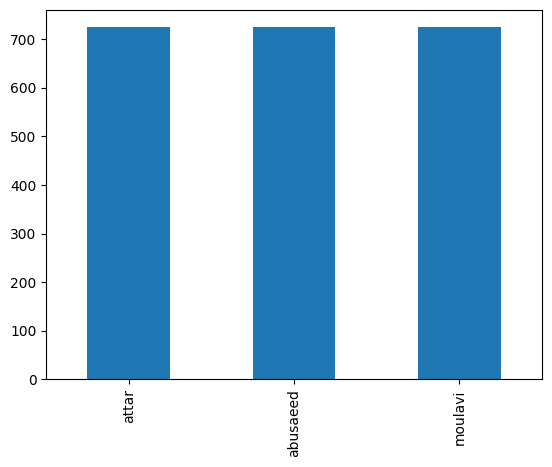

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'moulavi']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,سالک گرم شیب فراز شمع گداخت سوز گداز دلش عالم ...,attar,1
1,قطع پایانت ذره آفتاب بگزینی ره درافتد جانت ظاه...,attar,1
2,بحری آسمان زمین وینجا العرش تاثری قطره دریا قطره,attar,1
3,لحظه عشق توام سرشوئی پای گم گوئی مژهای بریزم ج...,attar,1
4,سنگ لعل کانم بینم قطره بارانم برخاست ننشیند نش...,attar,1
...,...,...,...
2167,توبه دل آهن کشتن بنده روشن زلف شکن شکنست توبه,moulavi,2
2168,عشق توبه شیشه بشکست شیشه شکست کیست داند بست شک...,moulavi,2
2169,شمعی اینخانه بدی خانه دلهاست دل خیال برخاست نی...,moulavi,2
2170,کفم زر پنداشت زر وفا بگذاشت حلقه گوش پندارم کا...,moulavi,2


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'abusaeed': 0, 'attar': 1, 'moulavi': 2}
id2label: {0: 'abusaeed', 1: 'attar', 2: 'moulavi'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoConfig, AutoTokenizer, BertTokenizer

MODEL_NAME = 'bert-base-multilingual-cased'
config = AutoConfig.from_pretrained(
    MODEL_NAME, **{
        'label2id': label2id,
        'id2label': id2label,
    })
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
print(config.to_json_string())

{
  "_name_or_path": "bert-base-multilingual-cased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "abusaeed",
    "1": "attar",
    "2": "moulavi"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "abusaeed": 0,
    "attar": 1,
    "moulavi": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.32.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 119547
}



In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 32

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
# y_valid_le  = le.fit_tranform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
test_labels = to_categorical(y_test_le)
# val_labels = to_categorical(y_valid_le)

In [ ]:
y_valid_le  = le.fit_transform(val_data['label_id'])
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)

# train_size = int((tokens['input_ids'].shape[0] / BATCH_SIZE) * 0.8)

train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFBertForSequenceClassification
base_model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, config=config)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

# embeddings = AlBertmodel(input_ids, attention_mask=mask)
classificationResult = base_model([input_ids, mask]).logits
# flatten_sent = tf.keras.layers.Flatten()(classificationResult)
Final_output = tf.keras.layers.Dense(3, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_for_sequence_classific  TFSequenceClassifie  177855747  ['input_ids[0][0]',              
 ation (TFBertForSequenceClassi  rOutput(loss=None,               'attention_mask[0][0]']         
 fication)                      logits=(None, 3),                                                 
                                 hidden_states=None                                           

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #learning_rate=1e-4, decay=1e-6
loss= tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
54/54 [==============================] - 99s 831ms/step - loss: 1.0910 - accuracy: 0.3686 - val_loss: 1.0005 - val_accuracy: 0.5156
Epoch 2/5
54/54 [==============================] - 44s 816ms/step - loss: 0.9753 - accuracy: 0.5179 - val_loss: 0.8801 - val_accuracy: 0.5781
Epoch 3/5
54/54 [==============================] - 46s 855ms/step - loss: 0.8308 - accuracy: 0.6181 - val_loss: 1.0334 - val_accuracy: 0.5104
Epoch 4/5
54/54 [==============================] - 46s 850ms/step - loss: 0.6366 - accuracy: 0.7396 - val_loss: 0.8794 - val_accuracy: 0.6250
Epoch 5/5
54/54 [==============================] - 44s 817ms/step - loss: 0.4551 - accuracy: 0.8391 - val_loss: 0.9497 - val_accuracy: 0.6172


In [ ]:
# added_epochs = 5
# total_epochs =  5 + added_epochs

# secondhistory = model.fit(train_dataset,
#                          epochs=total_epochs,
#                          initial_epoch=history.epoch[-1],
#                          validation_data=val_dataset)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

1/1 [==============================] - 0s 268ms/step - loss: 0.9592 - accuracy: 0.6562


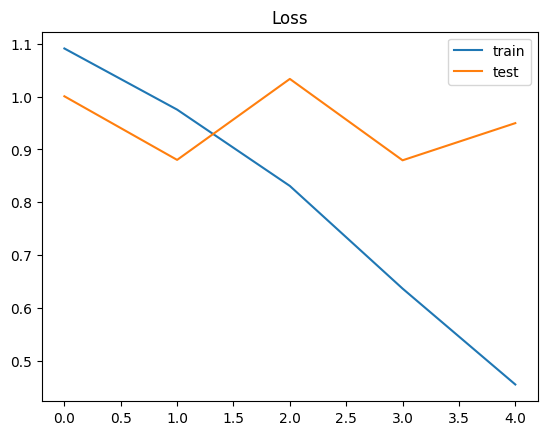

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

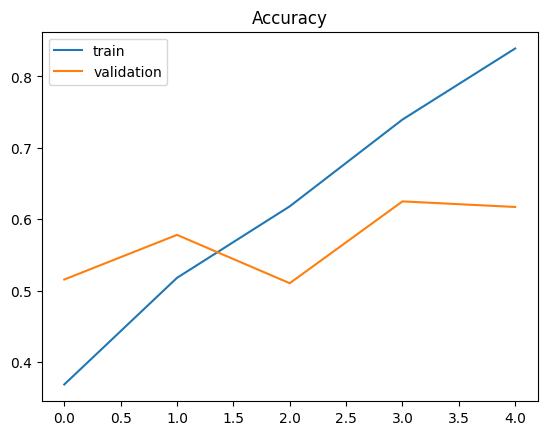

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


1/1 [==============================] - 0s 98ms/step


<ipython-input-40-a47a631fb331>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted-label'][i] = pred


1/1 [==============================] - 0s 60ms/step


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

              precision    recall  f1-score   support

    abusaeed       0.42      0.45      0.43        11
       attar       0.80      0.67      0.73        18
     moulavi       0.59      0.67      0.62        15

    accuracy                           0.61        44
   macro avg       0.60      0.60      0.60        44
weighted avg       0.63      0.61      0.62        44



<Axes: >

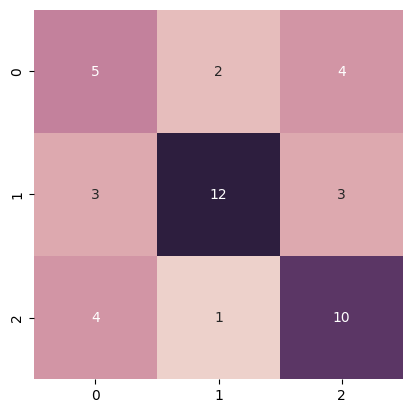

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
path = "/content/gdrive/MyDrive/RobaeemBertModel/weights"

In [ ]:
model.save_weights(path)